In [32]:
import numpy as np
import matplotlib.pyplot as plt

В цьому домашньому завданні ми реалізуємо логістичну регресію на `numpy`.
Ці завдання допоможуть вам ґрунтовно засвоїти основні концепції логістичної регресії та реалізувати їх на практиці 🔥

#### Завдання 1: Реалізація функції сигмоїди
1. З використанням `numpy` напишіть функцію `sigmoid(z)` для обчислення значення сигмоїди згідно з формулою:
   $$
   \sigma(z) = \frac{1}{1 + e^{-z}}
   $$
2. Використовуючи цю функцію, обчисліть значення сигмоїди для наступних даних: $ z = [-2, -1, 0, 1, 2] $. Виведіть результат обчислень.


In [8]:
def sigmoid(z):
    """
    Обчислює функцію сигмоїди.

    Параметри:
    - z: Скаляри або масиви NumPy.

    Повертає:
    - Сигмоїда від z.
    """
    return 1 / (1 + np.exp(-z))

numbers = np.array([-2, -1, 0, 1, 2])

for number in numbers:
    print(f"Sigmoid for {number}:", sigmoid(number))

Sigmoid for -2: 0.11920292202211755
Sigmoid for -1: 0.2689414213699951
Sigmoid for 0: 0.5
Sigmoid for 1: 0.7310585786300049
Sigmoid for 2: 0.8807970779778823




#### Завдання 2: Реалізація функції гіпотези для логістичної регресії
1. Напишіть функцію `hypothesis(theta, X)`, яка обчислює гіпотезу для логістичної регресії, використовуючи функцію сигмоїди. Формула гіпотези:
   $$
   h_\theta(x) = \sigma(\theta^T x) = \frac{1}{1 + e^{-\theta^T x}}
   $$
2. Використайте функцію `hypothesis` для обчислення значень гіпотези для наступних даних:
   
   $\theta = [0.5, -0.5]$
   
   $X = \begin{bmatrix} 1 & 2 \\ 1 & -1 \\ 1 & 0 \\ 1 & 1 \end{bmatrix}$

  Виведіть результат обчислень.


In [21]:
def hypothesis(theta, X):
    """
    Обчислює гіпотезу для логістичної регресії.

    Параметри:
    - theta: Вектор параметрів (numpy array) розмірності (n_features,)
    - X: Матриця ознак (numpy array) розмірності (n_samples, n_features)

    Повертає:
    - h: Вектор прогнозів (numpy array) розмірності (n_samples,)
    """
    return sigmoid(np.dot(X, theta))

theta = np.array([0.5, -0.5])
X = np.array([
        [1, 2],
        [1, -1],
        [1, 0],
        [1, 1]
     ])

print(hypothesis(theta, X))

[0.37754067 0.73105858 0.62245933 0.5       ]


#### Завдання 3: Реалізація функції для підрахунку градієнтів фукнції втрат
1. Напишіть функцію `compute_gradient(theta, X, y)`, яка обчислює градієнти функції втрат для логістичної регресії. Формула для обчислення градієнта:
   $$
   \frac{\partial L(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} \left[ (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)} \right]
   $$
2. Використайте функцію `compute_gradient` для обчислення градієнтів для наступних даних:

  $\theta = [0.5, -0.5]$

  $X = \begin{bmatrix} 1 & 2 \\ 1 & -1 \\ 1 & 0 \\ 1 & 1 \end{bmatrix}$

  $y = [1, 0, 1, 0]$

  Виведіть результат обчислень.

In [27]:
def compute_gradient(theta, X, y):
    """
    Обчислює градієнти функції втрат для логістичної регресії.

    Параметри:
    - theta: Вектор параметрів (numpy array) розмірності (n_features,)
    - X: Матриця ознак (numpy array) розмірності (n_samples, n_features)
    - y: Вектор цільових значень (numpy array) розмірності (n_samples,)

    Повертає:
    - gradient: Вектор градієнтів (numpy array) розмірності (n_features,)
    """

    m = len(y)
    h = hypothesis(theta, X)
    print(h)
    gradient = 1/m * np.dot(X.T, h - y)
    return gradient

theta = np.array([0.5, -0.5])
X = np.array([
        [1, 2],
        [1, -1],
        [1, 0],
        [1, 1]
     ])
y = np.array([1, 0, 1, 0])

compute_gradient(theta, X, y)


[0.37754067 0.73105858 0.62245933 0.5       ]


array([ 0.05776464, -0.36899431])


#### Завдання 4: Реалізація повного батч градієнтного спуску

**Задача:**
1. Напишіть функцію `full_batch_gradient_descent(X, y, lr=0.1, epochs=100)`, яка реалізує алгоритм Full градієнтного спуску для логістичної регресії. Використовуйте такі формули:
   - Гіпотеза: $ h_\theta(x) = \sigma(\theta^T x) $
   - Оновлення параметрів: $ \theta_j := \theta_j - \alpha \frac{\partial L(\theta)}{\partial \theta_j} $
2. Використайте функцію `full_batch_gradient_descent` для обчислення параметрів моделі на наступних даних:

  $X = \begin{bmatrix} 1 & 2 \\ 1 & -1 \\ 1 & 0 \\ 1 & 1 \end{bmatrix}$

  $y = [1, 0, 1, 0]$

  Увага! Матриця $X$ вже має стовпець одиниць і передбачається, що це. - стовпець для intercept - параметра зсуву.

  Виведіть результат обчислень.


[0.5 0.5 0.5 0.5]
Epoch 1/100 - Loss: 0.687014
[0.5124974  0.49375033 0.5        0.50624967]
[0.52443374 0.48765874 0.49992189 0.51218514]
[0.53582306 0.48172184 0.49977064 0.51782004]
[0.54668179 0.4759361  0.49955105 0.52316799]
[0.55702811 0.47029788 0.49926769 0.52824242]
[0.56688138 0.46480345 0.49892497 0.5330565 ]
[0.57626173 0.45944909 0.49852706 0.53762302]
[0.58518966 0.45423104 0.49807793 0.5419544 ]
[0.59368572 0.44914557 0.49758136 0.54606258]
Epoch 10/100 - Loss: 0.648177
[0.6017703  0.44418899 0.4970409  0.54995903]
[0.60946343 0.43935765 0.49645993 0.55365472]
[0.61678463 0.43464796 0.49584162 0.55716012]
[0.62375281 0.4300564  0.49518896 0.56048522]
[0.63038621 0.42557954 0.49450476 0.56363949]
[0.63670231 0.42121402 0.49379167 0.56663193]
[0.64271785 0.41695656 0.49305217 0.56947107]
[0.64844877 0.41280399 0.4922886  0.57216499]
[0.65391025 0.40875319 0.49150315 0.57472133]
[0.65911668 0.40480117 0.49069785 0.57714732]
Epoch 20/100 - Loss: 0.625387
[0.66408172 0.40094

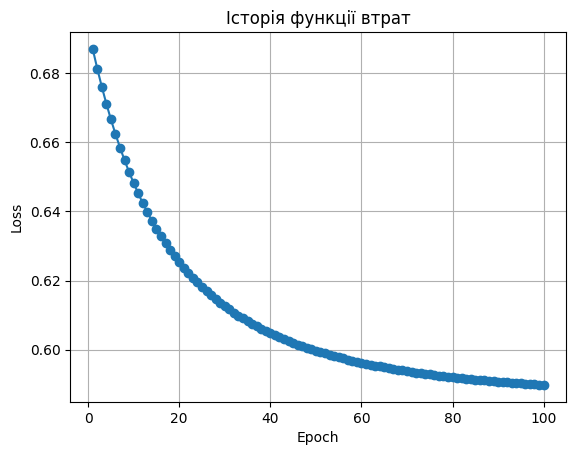

In [35]:
def compute_loss(theta, X, y):
    """
    Обчислює функцію втрат (логарифмічні втрати) для логістичної регресії.

    Параметри:
    - theta: Вектор параметрів (numpy array) розмірності (n_features,)
    - X: Матриця ознак (numpy array) розмірності (n_samples, n_features)
    - y: Вектор цільових значень (numpy array) розмірності (n_samples,)

    Повертає:
    - loss: Скаляра, значення функції втрат.
    """
    m = len(y)
    h = hypothesis(theta, X)
    # Додавання невеликої константи для уникнення log(0)
    epsilon = 1e-15
    h = np.clip(h, epsilon, 1 - epsilon)
    loss = - (1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return loss

def full_batch_gradient_descent(X, y, lr=0.1, epochs=100):
    """
    Реалізує повний батч градієнтний спуск для логістичної регресії.

    Параметри:
    - X: Матриця ознак (numpy array) розмірності (n_samples, n_features)
    - y: Вектор цільових значень (numpy array) розмірності (n_samples,)
    - lr: Швидкість навчання (float, за замовчуванням 0.1)
    - epochs: Кількість ітерацій (int, за замовчуванням 100)

    Повертає:
    - theta: Оновлений вектор параметрів (numpy array) розмірності (n_features,)
    - loss_history: Список значень функції втрат на кожній ітерації
    """
    n_features = X.shape[1]
    theta = np.zeros(n_features)  # Ініціалізація параметрів нулями
    loss_history = []

    for epoch in range(epochs):
        grad = compute_gradient(theta, X, y)
        theta -= lr * grad  # Оновлення параметрів

        # Обчислення функції втрат для моніторингу
        loss = compute_loss(theta, X, y)
        loss_history.append(loss)

        # Вивід прогресу кожні 10 ітерацій
        if (epoch + 1) % 10 == 0 or epoch == 0:
            print(f"Epoch {epoch + 1}/{epochs} - Loss: {loss:.6f}")

    return theta, loss_history

theta = np.array([0.5, -0.5])
X = np.array([
        [1, 2],
        [1, -1],
        [1, 0],
        [1, 1]
     ])
y = np.array([1, 0, 1, 0])

final_theta, loss_history = full_batch_gradient_descent(X, y, lr=0.1, epochs=100)

print("\nКінцеві параметри theta:")
print(final_theta)

plt.plot(range(1, len(loss_history) + 1), loss_history, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Історія функції втрат')
plt.grid(True)
plt.show()


#### Завдання 5. Обчислення точності моделі

1. Напишіть функцію `predict_proba(theta, X)`, яка використовує знайдені параметри $\theta$ для обчислення ймовірностей належності поточного прикладу з даних до класу $y=1$ на основі значень $\sigma(\theta^T x)$.

2. Напишіть функцію `predict(theta, X, threshold=0.5)`, яка обчислює клас з передбаченої імовірності належності екземпляра до класу 1 з порогом 0.5. Тобто якщо ймовірність менше 0.5, то передбачаємо клас 0, інакше клас 1.

3. Напишіть функцію `accuracy(y_true, y_pred)`, яка обчислює точність моделі, визначивши частку правильно передбачених класів.

  Формула метрики Accuracy:
  $$
  \text{Accuracy} = \frac{\sum_{i=1}^{m} I(\hat{{y}^{(i)}} = y^{(i)})}{m}
  $$

  де $\hat{{y}^{(i)}}$ - передбачене значення класу, $I$ - індикаторна функція (яка дорівнює 1, якщо умова виконується, і 0 - якщо ні), $m$ - кількість прикладів.

4. Обчисліть з використанням даних в завданні 4 $X$, $y$ та обчислених коефіцієнтах $\theta$ та виведіть на екран:
  - передбачені моделлю імовірності належності кожного з екземплярів в матриці `X` до класу 1
  - класи кожного екземпляра з матриці `X`
  - точність моделі.

In [38]:
def predict_proba(theta, X):
    """
    Обчислює ймовірності належності до класу 1 для кожного екземпляра.

    Параметри:
    - theta: Вектор параметрів (numpy array) розмірності (n_features,)
    - X: Матриця ознак (numpy array) розмірності (n_samples, n_features)

    Повертає:
    - proba: Вектор ймовірностей (numpy array) розмірності (n_samples,)
    """
    return hypothesis(theta, X)

def predict(theta, X, threshold=0.5):
    """
    Передбачає клас для кожного екземпляра на основі ймовірностей та порогу.

    Параметри:
    - theta: Вектор параметрів (numpy array) розмірності (n_features,)
    - X: Матриця ознак (numpy array) розмірності (n_samples, n_features)
    - threshold: Порогове значення для класифікації (float, за замовчуванням 0.5)

    Повертає:
    - predictions: Вектор передбачених класів (numpy array) розмірності (n_samples,)
    """
    proba = predict_proba(theta, X)
    predictions = (proba >= threshold).astype(int)
    return predictions

def accuracy(y_true, y_pred):
    """
    Обчислює точність моделі.

    Параметри:
    - y_true: Вектор істинних класів (numpy array) розмірності (n_samples,)
    - y_pred: Вектор передбачених класів (numpy array) розмірності (n_samples,)

    Повертає:
    - accuracy: Точність моделі (float)
    """
    correct = np.sum(y_true == y_pred)
    total = len(y_true)
    return correct / total


# Початкові параметри
theta_initial = np.array([0.5, -0.5])  # Можна також почати з нулів

# Матриця ознак (включає стовпець одиниць для intercept)
X = np.array([
    [1,  2],
    [1, -1],
    [1,  0],
    [1,  1]
])

# Вектор цільових значень
y = np.array([1.0, 0.0, 1.0, 0.0])  # Має бути 4 елементи, відповідно до X

# Навчання моделі
final_theta, loss_history = full_batch_gradient_descent(X, y, lr=0.1, epochs=100)

probas = predict_proba(theta_initial, X)
print("\nПередбачені ймовірності належності до класу 1:")
for i, prob in enumerate(probas):
    print(f"Приклад {i + 1}: {prob:.6f}")

# Передбачення класів
predictions = predict(theta_initial, X)
print("Передбачення класів:")
for i, pred in enumerate(predictions):
    print(f"Приклад {i + 1}: {pred}")

#Обчислення точності
model_accuracy = accuracy(y, predictions)
print(f"\nТочність моделі: {model_accuracy * 100:.2f}%")

[0.5 0.5 0.5 0.5]
Epoch 1/100 - Loss: 0.687014
[0.5124974  0.49375033 0.5        0.50624967]
[0.52443374 0.48765874 0.49992189 0.51218514]
[0.53582306 0.48172184 0.49977064 0.51782004]
[0.54668179 0.4759361  0.49955105 0.52316799]
[0.55702811 0.47029788 0.49926769 0.52824242]
[0.56688138 0.46480345 0.49892497 0.5330565 ]
[0.57626173 0.45944909 0.49852706 0.53762302]
[0.58518966 0.45423104 0.49807793 0.5419544 ]
[0.59368572 0.44914557 0.49758136 0.54606258]
Epoch 10/100 - Loss: 0.648177
[0.6017703  0.44418899 0.4970409  0.54995903]
[0.60946343 0.43935765 0.49645993 0.55365472]
[0.61678463 0.43464796 0.49584162 0.55716012]
[0.62375281 0.4300564  0.49518896 0.56048522]
[0.63038621 0.42557954 0.49450476 0.56363949]
[0.63670231 0.42121402 0.49379167 0.56663193]
[0.64271785 0.41695656 0.49305217 0.56947107]
[0.64844877 0.41280399 0.4922886  0.57216499]
[0.65391025 0.40875319 0.49150315 0.57472133]
[0.65911668 0.40480117 0.49069785 0.57714732]
Epoch 20/100 - Loss: 0.625387
[0.66408172 0.40094